# Customer Segmentation using KMeans

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parv1509","key":"131cec0ea91b12befcd5e48e87ec7460"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vetrirah/customer

Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer
License(s): CC0-1.0
customer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip customer.zip


Archive:  customer.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd

df = pd.read_csv("Train.csv")
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
def encode_gender(df, col='Gender'):

    df[col] = df[col].map({'Male': 1, 'Female': 0})
    return df
df = encode_gender(df)


In [ ]:
def encode_yes_no(df, col):

    df[col] = df[col].map({'Yes': 1, 'No': 0})
    return df


In [ ]:
df = encode_yes_no(df, 'Ever_Married')
df = encode_yes_no(df, 'Graduated')


In [ ]:
def encode_spending_score(df, col='Spending_Score'):
    mapping = {
        'Low': 0,
        'Average': 1,
        'High': 2
    }
    df[col] = df[col].map(mapping)
    return df


In [ ]:
df = encode_spending_score(df)


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
df["Ever_Married"]=df["Ever_Married"].fillna(value=df["Ever_Married"].median)

In [ ]:
df["Work_Experience"]=df["Work_Experience"].fillna(value=df["Work_Experience"].median)

In [ ]:
df["Family_Size"]=df["Family_Size"].fillna(value=df["Family_Size"].median)

In [ ]:
df["Profession"]=df["Profession"].fillna(value=df["Profession"].median)
df["Graduated"]=df["Graduated"].fillna(value=df["Graduated"].median)

In [ ]:
df["Graduated"]=df["Graduated"].fillna(value=df["Graduated"].median)

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,76


In [ ]:
df = df.drop(columns=['ID', 'Segmentation', 'Var_1'])


In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0.0,22,0.0,Healthcare,1.0,0,4.0
1,0,1.0,38,1.0,Engineer,<bound method Series.median of 0 1.0\n1 ...,1,3.0
2,0,1.0,67,1.0,Engineer,1.0,0,1.0
3,1,1.0,67,1.0,Lawyer,0.0,2,2.0
4,0,1.0,40,1.0,Entertainment,<bound method Series.median of 0 1.0\n1 ...,2,6.0


In [ ]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing',
       <bound method Series.median of 0          Healthcare
       1            Engineer
       2            Engineer
       3              Lawyer
       4       Entertainment
                   ...
       8063              NaN
       8064        Executive
       8065       Healthcare
       8066       Healthcare
       8067        Executive
       Name: Profession, Length: 8068, dtype: object>      ], dtype=object)

In [ ]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

df = pd.get_dummies(
    df,
    columns=['Profession'],
    drop_first=True
)


In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0.0,22,0.0,1.0,0,4.0,False,False,False,False,False,True,False,False,False
1,0,1.0,38,1.0,<bound method Series.median of 0 1.0\n1 ...,1,3.0,False,False,True,False,False,False,False,False,False
2,0,1.0,67,1.0,1.0,0,1.0,False,False,True,False,False,False,False,False,False
3,1,1.0,67,1.0,0.0,2,2.0,False,False,False,False,False,False,False,True,False
4,0,1.0,40,1.0,<bound method Series.median of 0 1.0\n1 ...,2,6.0,False,False,False,True,False,False,False,False,False


In [ ]:
X = df.select_dtypes(include=['int64', 'float64', 'uint8'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [ ]:
wcss = []


In [ ]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

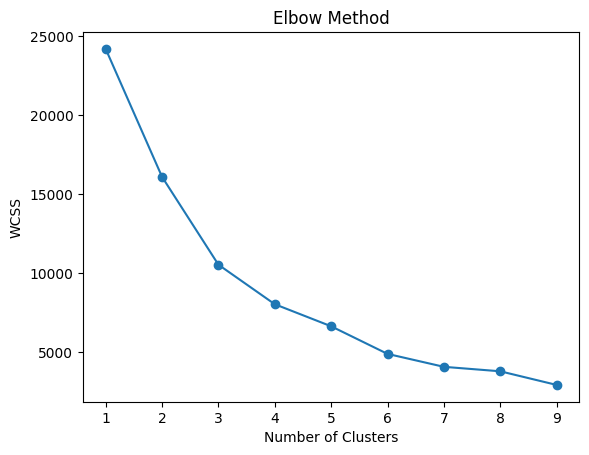

In [ ]:
plt.plot(range(1, 10), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

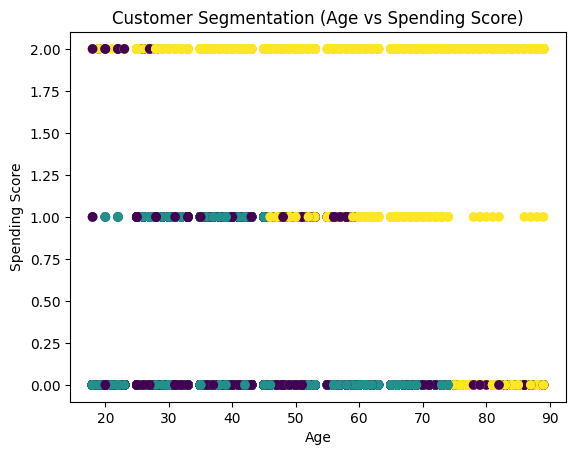

In [ ]:
plt.scatter(
    df['Age'],
    df['Spending_Score'],
    c=df['Cluster'],
)

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (Age vs Spending Score)")
plt.show()


# Movie Recommendation System

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ----------------------------
# 1. Create Dataset
# ----------------------------
movies = {
    "title": [
        "Inception",
        "Interstellar",
        "The Dark Knight",
        "Avengers",
        "Titanic",
        "Gravity"
    ],
    "description": [
        "dream inside dream sci fi thriller",
        "space travel black hole sci fi drama",
        "batman joker crime action thriller",
        "superheroes save world action fantasy",
        "romantic love story ship disaster",
        "astronaut survival space thriller"
    ]
}

df = pd.DataFrame(movies)

# ----------------------------
# 2. TF-IDF Vectorization
# ----------------------------
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["description"])

# ----------------------------
# 3. Cosine Similarity
# ----------------------------
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# ----------------------------
# 4. Recommendation Function
# ----------------------------
def recommend_movies(movie_title, top_n=5):
    idx = df[df["title"] == movie_title].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]

    recommendations = [df.iloc[i[0]]["title"] for i in similarity_scores]
    return recommendations

# ----------------------------
# 5. Test Recommendation
# ----------------------------
print("Recommended Movies:")
print(recommend_movies("Inception"))


Recommended Movies:
['Interstellar', 'Gravity', 'The Dark Knight', 'Avengers', 'Titanic']


In [ ]:
def recommend_from_custom_input(user_description, top_n=5):
    # Vectorize user input
    user_vector = tfidf.transform([user_description])

    # Calculate similarity
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix)[0]

    # Get top N similar movies
    similar_indices = similarity_scores.argsort()[::-1][:top_n]

    recommendations = df.iloc[similar_indices]["title"].tolist()
    return recommendations

# ----------------------------
# 4. Test with Custom Input
# ----------------------------
custom_input = "space sci fi survival astronaut"
print("Recommended Movies:")
print(recommend_from_custom_input(custom_input))

Recommended Movies:
['Gravity', 'Interstellar', 'Inception', 'Titanic', 'The Dark Knight']


# Xtraaa Practice

In [ ]:
import pandas as pd

data = {
    "title": [
        "Python Basics",
        "Advanced Python",
        "Machine Learning Fundamentals",
        "Deep Learning with Python",
        "Data Science Handbook",
        "Statistics for Data Science",
        "AI for Beginners",
        "Natural Language Processing",
        "Computer Vision Guide",
        "Big Data Analytics",
        "SQL for Data Analysis",
        "Python for Web Development"
    ],

    "description": [
        "python programming basics variables loops functions",
        "advanced python decorators generators multithreading",
        "machine learning supervised unsupervised algorithms",
        "deep learning neural networks tensorflow keras",
        "data science data analysis visualization python",
        "statistics probability hypothesis testing regression",
        "artificial intelligence basics search logic",
        "natural language processing text mining nlp",
        "computer vision image processing opencv",
        "big data hadoop spark analytics",
        "sql queries database data analysis",
        "python web development flask django"
    ]
}

df = pd.DataFrame(data)
print(df.head())


                           title  \
0                  Python Basics   
1                Advanced Python   
2  Machine Learning Fundamentals   
3      Deep Learning with Python   
4          Data Science Handbook   

                                         description  
0  python programming basics variables loops func...  
1  advanced python decorators generators multithr...  
2  machine learning supervised unsupervised algor...  
3     deep learning neural networks tensorflow keras  
4    data science data analysis visualization python  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf=TfidfVectorizer(stop_words="english")
tfidf_matrix=tfidf.fit_transform(df["description"])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
def recommend_books(book_title, top_n=5):
  if book_title not in df["title"].values:
    return "NHi HAI YE BOOK MERE PASS"
  idx=df[df["title"]==book_title].index[0]
  similarity_score=list(enumerate(cosine_sim[idx]))
  sorted_sim=sorted(similarity_score,key=lambda x: x[1],reverse=True)
  sorted_sim=sorted_sim[1:top_n]
  recomm=[]
  for i in sorted_sim:
    recomm.append(df.iloc[i[0]]["title"])
  return recomm

In [ ]:
print("Recommended books:")
print(custom_input("AI Basics"))


Recommended books:
['AI for Beginners', 'Python Basics', 'Advanced Python', 'Machine Learning Fundamentals', 'Deep Learning with Python']


In [ ]:
def custom_input(user_description, top_n=5):

    # 1️⃣ User text → same TF-IDF space
    user_vector = tfidf.transform([user_description])

    # 2️⃣ User vs all books comparison
    similarity_scores = cosine_similarity(
        user_vector,        # user vector
        tfidf_matrix        # all book vectors
    )[0]

    # 3️⃣ Score ke saath index jodo
    scored_books = list(enumerate(similarity_scores))

    # 4️⃣ Similarity ke basis pe sort
    scored_books = sorted(
        scored_books,
        key=lambda x: x[1],
        reverse=True
    )

    # 5️⃣ Top N results lo
    top_books = scored_books[:top_n]

    # 6️⃣ Titles nikaalo
    recommendations = []
    for i in top_books:
        recommendations.append(df.iloc[i[0]]["title"])

    return recommendations
